Mencek Version

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


Install Gdown

In [2]:
!pip install gdown

Unduh File menggunakan gdown

In [3]:
!gdown --id 1ZKnT0F95tRNnjo57qMixfACoFy3ITEj7 -O /tmp/messy_vs_clean_room.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ZKnT0F95tRNnjo57qMixfACoFy3ITEj7
From (redirected): https://drive.google.com/uc?id=1ZKnT0F95tRNnjo57qMixfACoFy3ITEj7&confirm=t&uuid=ae2a747c-49f5-40be-9a11-4d6e77a11d7d
To: /tmp/messy_vs_clean_room.zip
100% 70.4M/70.4M [00:00<00:00, 139MB/s]


Ekstraksi pada file zip

In [4]:
 # melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [6]:
os.listdir('/tmp/images/val')

['messy', 'clean']

Kode berikut menunjukkan proses augmentasi gambar pada setiap sampel di dataset.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest')
test_datagen = ImageDataGenerator(
                    rescale=1./255)

siapkan data latih dan validasi dari kumpulan data gambar yang di-load dalam
memori melalui fungsi flow() berikut.

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    class_mode='binary'  # karena ini merupakan masalah klasifikasi 2 kelas
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # direktori data validasi
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,  # karena ini merupakan masalah klasifikasi 2 kelas
    class_mode='binary'
)


Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


layer max pooling berguna untuk mereduksi resolusi gambar
sehingga proses pelatihan model lebih cepat. Nah, pada model CNN, proses klasifikasi
gambar hanya berfokus pada atribut-atribut unik yang membedakan tiap kategori. Sehingga,
teknik ini dinilai lebih optimal dibandingkan hanya menggunakan model MLP yang
membedakan tiap kategori dengan melihat keseluruhan piksel-piksel pada gambar.

In [16]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu',
input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),])
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu',
input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,529,665 (51.61 MB)

 Trainable params: 13,529,665 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
 # compile model dengan 'adam' optimizer loss function
'binary_crossentropy'
model.compile(loss='binary_crossentropy',

optimizer=tf.optimizers.Adam(),

metrics=['accuracy'])

In [22]:
# latih model dengan model.fit
model.fit(

train_generator,
steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
epochs=20, # tambahkan epochs jika akurasi model belum optimal
validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
verbose=2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 21s - 823ms/step - accuracy: 0.5400 - loss: 0.7236 - val_accuracy: 0.5000 - val_loss: 0.6799
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'

Saving 8.png to 8.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
8.png
messy


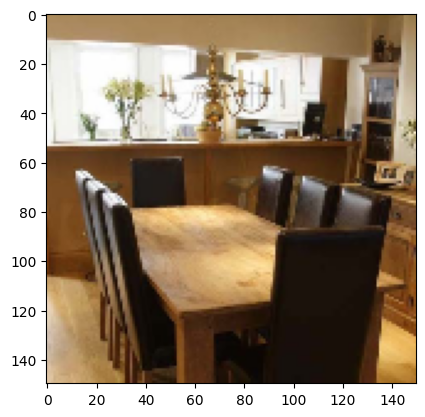

In [24]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
# predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
    print('clean')
  else:
   print('messy')